In [1]:
# in this notebook, I determine the LDA axis best separating L2/3 from L4 PCs. I find this to be an axis corresponding
# to highly contrast sensitive, large size preferring neurons.
# This subset of neurons becomes much more common in L2/3

In [2]:
# load the data

In [1]:
import pyute as ut
import autograd.numpy as np
import matplotlib.pyplot as plt
import sklearn
import h5py
import pdb
import scipy.optimize as sop
from autograd import elementwise_grad as egrad
from mpl_toolkits.mplot3d import Axes3D
import sklearn.discriminant_analysis as skd
import matplotlib.patches as mp
import scipy.stats as sst
%matplotlib notebook

/home/mossing/Documents/code/downloads/OASIS/oasis/functions.py:13: UserWarning: Could not find cvxpy. Don't worry, you can still use OASIS, just not the slower interior point methods we compared to in the papers.
  warn("Could not find cvxpy. Don't worry, you can still use OASIS, " +


ModuleNotFoundError: No module named 'autograd'

In [ ]:
    def compute_tuning(dsfile):
        with h5py.File(dsfile,mode='r') as f:
            keylist = [key for key in f.keys()]
            tuning = [None]*len(keylist)
            uparam = [None]*len(keylist)
            for ikey in range(len(keylist)):
#             try:
                session = f[keylist[ikey]]
                print(session)
                print([key for key in session.keys()])
                if 'size_contrast_0' in session:
                    sc0 = session['size_contrast_0']
                    data = sc0['decon'][:]
                    stim_id = sc0['stimulus_id'][:]
                    nbefore = sc0['nbefore'][()]
                    nafter = sc0['nafter'][()]
                    trialrun = sc0['running_speed_cm_s'][:,nbefore:-nafter].mean(-1)>10 #
                    print(sc0['running_speed_cm_s'].shape)
                    print(np.nanmean(trialrun))
                    if np.nanmean(trialrun)>0.4:
                        tuning[ikey] = ut.compute_tuning(data,stim_id,trial_criteria=trialrun)[:]
                    for param in sc0['stimulus_parameters']:
                        uparam[ikey] = sc0[param][:]
    #             except:
    #                 print('could not do '+keylist[ikey])
        return tuning,uparam

In [6]:
dsname_pc = '/home/mossing/Documents/notebooks/shared_data/pyr_l23_data_struct.hdf5'
tuning_pc,uparam_pc = compute_tuning(dsname_pc)

<HDF5 group "/session_181205_M10130" (7 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'mouse_id', 'size_contrast_0']
(1400, 31)
0.26785714285714285
<HDF5 group "/session_181209_M8536" (8 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'figure_ground_0', 'mouse_id', 'size_contrast_0']
(1400, 31)
0.1692857142857143
<HDF5 group "/session_181213_M8536" (7 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'mouse_id', 'size_contrast_0']
(1400, 47)
0.9614285714285714
<HDF5 group "/session_181214_M10130" (7 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'mouse_id', 'size_contrast_0']
(1400, 47)
0.5857142857142857
<HDF5 group "/session_190102_M10130" (7 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'mouse_id', 'size_contrast_0']
(2400, 47)
0.5508333333333333
<HDF5 group "/session_190128_M8982" (8 members)>
['cell_center', 'cell_depth', 'cell_id', 'c

/home/mossing/Documents/code/adesnal/pyute.py:916: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


In [7]:
dsname_sst = '/home/mossing/Documents/notebooks/shared_data/sst_l23_data_struct.hdf5'
tuning_sst,uparam_sst = compute_tuning(dsname_sst)

<HDF5 group "/session_180713_M9053" (9 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'figure_ground_0', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
(1200, 31)
0.8091666666666667
<HDF5 group "/session_180714_M9053" (9 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'figure_ground_0', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
(1200, 31)
0.8441666666666666
<HDF5 group "/session_180802_M9053" (8 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
(1200, 31)
0.5083333333333333
<HDF5 group "/session_180821_M9417" (9 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'figure_ground_0', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
(1200, 31)
0.1475
<HDF5 group "/session_181117_M10039" (9 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'figure_ground_0', 'mouse_id', 'retinotopy_0', 'size_contrast_0']


In [8]:
dsname_vip = '/home/mossing/Documents/notebooks/shared_data/vip_l23_data_struct.hdf5'
tuning_vip,uparam_vip = compute_tuning(dsname_vip)

<HDF5 group "/session_180321_M7955" (8 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'figure_ground_0', 'mouse_id', 'retinotopy_0']
<HDF5 group "/session_180412_M7955" (8 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
(1000, 31)
0.989
<HDF5 group "/session_180516_M8956" (9 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'figure_ground_0', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
(1200, 31)
0.725
<HDF5 group "/session_180519_M8959" (8 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
(1200, 31)
0.9425
<HDF5 group "/session_180528_M8959" (9 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'figure_ground_0', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
(1200, 31)
0.6616666666666666
<HDF5 group "/session_180531_M8961" (9 members)>
['cell_center', 

In [9]:
dsname_l4 = '/home/mossing/Documents/notebooks/shared_data/pyr_l4_data_struct.hdf5'
tuning_l4,uparam_l4 = compute_tuning(dsname_l4)

<HDF5 group "/session_181127_M10073" (7 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'mouse_id', 'size_contrast_0']
(1400, 31)
0.1742857142857143
<HDF5 group "/session_190202_M10075" (8 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
(1440, 47)
0.39652777777777776
<HDF5 group "/session_190304_M10077" (8 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
(1440, 47)
0.44027777777777777
<HDF5 group "/session_190620_M10616" (8 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
(2016, 47)
0.4568452380952381
<HDF5 group "/session_190620_M10619" (8 members)>
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'mouse_id', 'retinotopy_0', 'size_contrast_0']
(2016, 47)
0.3993055555555556


In [10]:
with h5py.File(dsname_vip,mode='r') as ds:
    keylist = list(ds.keys())
    print(list(ds[keylist[0]].keys()))

['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'figure_ground_0', 'mouse_id', 'retinotopy_0']


In [11]:
def average_up(arr):
    return np.nanmean(np.nanmean(arr[:,:,:,:,8:-8],-1),-1) #.reshape((arr.shape[0],-1))

In [12]:
def columnize(arr):
    output = np.nanmean(arr,0).flatten()
    output = output/output.max()
    return output

In [13]:
rpc = average_up(np.concatenate([x[:,:5,[0,-5,-4,-3,-2,-1]] for x in [r for r in tuning_pc if not r is None]],axis=0))
rsst = average_up(np.concatenate([x for x in [r for r in tuning_sst if not r is None]],axis=0))
rvip = average_up(np.concatenate([[x for x in [r for r in tuning_vip if not r is None]][i] for i in [1,2,3,4,6]],axis=0))
rl4 = average_up(np.concatenate([x[:,:5] for x in [r for r in tuning_l4 if not r is None]],axis=0))

/home/mossing/anaconda3/envs/py3/lib/python3.7/site-packages/autograd/tracer.py:48: RuntimeWarning: Mean of empty slice
  return f_raw(*args, **kwargs)


In [14]:
Rpc = rpc.reshape((rpc.shape[0],-1))
Rpc = Rpc/np.nanmax(Rpc,axis=1)[:,np.newaxis]
Rl4 = rl4.reshape((rl4.shape[0],-1))
Rl4 = Rl4/np.nanmax(Rl4,axis=1)[:,np.newaxis]

/home/mossing/anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/home/mossing/anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


In [22]:
F = np.concatenate((Rl4,Rpc),axis=0)
which = np.concatenate((np.zeros((Rl4.shape[0],)),np.ones((Rpc.shape[0],))),axis=0)
gd = ~np.isnan(F.sum(1))
F = F[gd]
which = which[gd]
u,s,v = np.linalg.svd(Rl4)

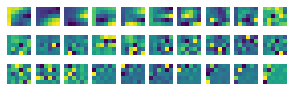

In [23]:
ut.imshow_in_rows(v.reshape((-1,5,6)))

In [24]:
u,s,v = np.linalg.svd(F)

<IPython.core.display.Javascript object>


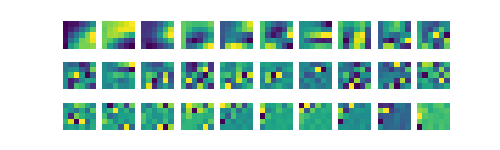

In [39]:
ut.imshow_in_rows(-v.reshape((-1,5,6)))

In [40]:
n_ev = 10
lda = skd.LinearDiscriminantAnalysis(solver='eigen',shrinkage='auto').fit(u[:,:n_ev] - (u[:,:n_ev] @ proj1)*proj1.T,which)

In [44]:
proj1 = lda.coef_.T/np.sqrt(np.sum(lda.coef_**2))

<IPython.core.display.Javascript object>


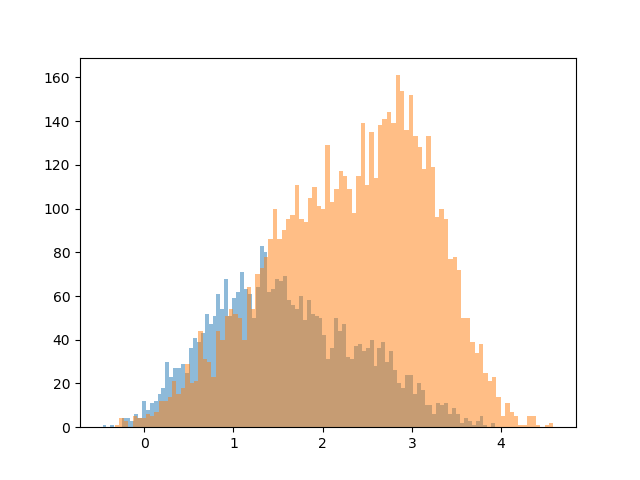

(array([  1.,   4.,   3.,   0.,   5.,   4.,   4.,   6.,   5.,   7.,  12.,
         12.,  14.,  21.,  15.,  18.,  29.,  20.,  21.,  44.,  31.,  30.,
         23.,  44.,  40.,  51.,  54.,  52.,  50.,  40.,  64.,  54.,  70.,
         73.,  78.,  86., 100.,  86.,  90.,  95.,  97., 111.,  95.,  94.,
        105., 110., 101., 100., 129., 103., 109., 117., 115., 109.,  98.,
        115., 139., 111., 135., 114., 138., 141., 144., 139., 161., 154.,
        136., 152., 133., 128., 118., 133., 119.,  96., 100.,  95.,  77.,
         78.,  72.,  50.,  50.,  39.,  34.,  38.,  25.,  21.,  23.,  14.,
          5.,  11.,   7.,   5.,   1.,   1.,   5.,   5.,   1.,   0.,   1.,
          2.]),
 array([-0.32758572, -0.27843517, -0.22928461, -0.18013406, -0.13098351,
        -0.08183296, -0.03268241,  0.01646814,  0.06561869,  0.11476924,
         0.16391979,  0.21307034,  0.2622209 ,  0.31137145,  0.360522  ,
         0.40967255,  0.4588231 ,  0.50797365,  0.5571242 ,  0.60627475,
         0.6554253 ,  0.70

In [42]:
plt.figure()
plt.hist(u[which==0,:n_ev] @ lda.coef_.T,bins=100,alpha=0.5)
plt.hist(u[which==1,:n_ev] @ lda.coef_.T,bins=100,alpha=0.5)

In [47]:
lda = skd.LinearDiscriminantAnalysis(solver='eigen',shrinkage='auto').fit(u[:,:n_ev] - (u[:,:n_ev] @ proj1)*proj1.T,which)

In [48]:
proj2 = lda.coef_.T/np.sqrt(np.sum(lda.coef_**2))

<IPython.core.display.Javascript object>


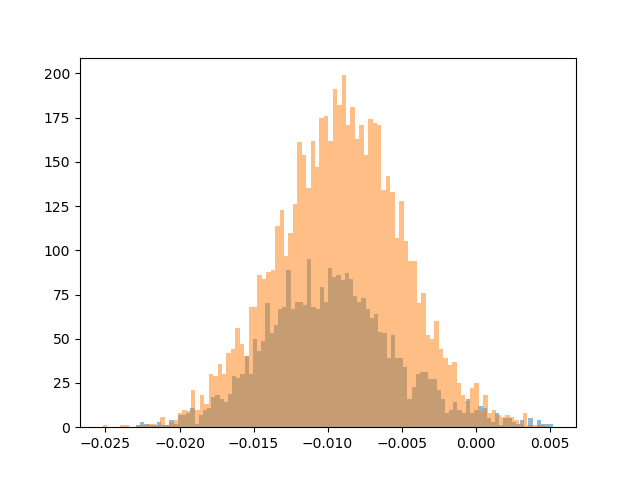

(array([  1.,   0.,   0.,   0.,   1.,   1.,   0.,   0.,   1.,   1.,   2.,
          2.,   1.,   6.,   1.,   3.,   4.,   8.,  10.,   9.,  21.,  10.,
         18.,  13.,  30.,  29.,  36.,  30.,  42.,  44.,  56.,  47.,  40.,
         68.,  68.,  86.,  84.,  88.,  89., 114., 123.,  97., 110., 126.,
        161., 154., 135., 162., 147., 175., 176., 162., 191., 182., 199.,
        171., 181., 163., 171., 154., 174., 172., 171., 134., 142., 133.,
        107., 128., 105.,  94.,  94.,  70.,  76.,  52.,  50.,  60.,  44.,
         39.,  35.,  37.,  25.,  18.,  15.,  22.,  25.,   9.,  18.,   8.,
         10.,   7.,   6.,   7.,   6.,   4.,   2.,   8.,   1.,   1.,   1.,
          1.]),
 array([-2.51992337e-02, -2.49002620e-02, -2.46012902e-02, -2.43023185e-02,
        -2.40033468e-02, -2.37043751e-02, -2.34054033e-02, -2.31064316e-02,
        -2.28074599e-02, -2.25084882e-02, -2.22095164e-02, -2.19105447e-02,
        -2.16115730e-02, -2.13126012e-02, -2.10136295e-02, -2.07146578e-02,
        -2.041

In [50]:
plt.figure()
plt.hist(u[which==0,:n_ev] @ proj2,bins=100,alpha=0.5)
plt.hist(u[which==1,:n_ev] @ proj2,bins=100,alpha=0.5)

In [132]:
def show_size_contrast(arr,show_labels=True,usize=np.array((5,8,13,22,36)),ucontrast=np.array((0,6,12,25,50,100))):
    nsize = len(usize)
    ncontrast = len(ucontrast)
    plt.imshow(arr)
    plt.xticks(np.arange(ncontrast),ucontrast)
    plt.yticks(np.arange(nsize),usize)
    if show_labels:
        plt.xlabel('contrast (%)')
        plt.ylabel('size ($^o$)')

In [139]:
def plot_ellipse(x,y,ctr_fn=np.mean,rad_fn=np.std,alpha=None,c=None,edge=True):
    ell = mp.Ellipse(xy=(ctr_fn(x),ctr_fn(y)),width=2*rad_fn(x),height=2*rad_fn(y))
    plt.gca().add_artist(ell)
    if not alpha is None:
        ell.set_alpha(alpha)
    if not c is None:
        ell.set_facecolor(colors[i])
    if edge:
        ell.set_edgecolor('k')

<IPython.core.display.Javascript object>


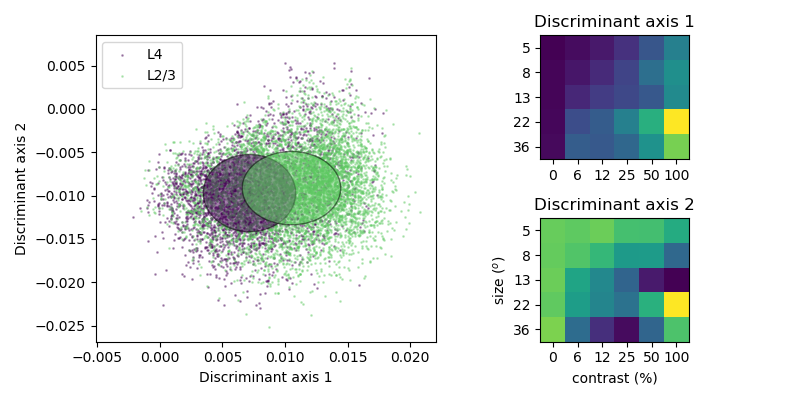

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

In [140]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(121)
layers = ['L4','L2/3']
colors = plt.cm.viridis(np.linspace(0,1.5,3))
for i in range(2):
    
    lkat = which==i
    x = u[lkat,:n_ev] @ proj1
    y = u[lkat,:n_ev] @ proj2
    ax.scatter(x,y,s=1,alpha=0.35,label=layers[i],c=colors[i])
    ax.scatter(x.mean(),y.mean(),s=10,c=colors[i])
    
    plot_ellipse(x,y,c=colors[i],alpha=0.5)
    
plt.legend()
plt.xlabel('Discriminant axis 1')
plt.ylabel('Discriminant axis 2')

ax = fig.add_subplot(222)
show_size_contrast((proj1.T @ v[:n_ev]).reshape((nsize,ncontrast)),show_labels=False)
plt.title('Discriminant axis 1')
ax = fig.add_subplot(224)
show_size_contrast((proj2.T @ v[:n_ev]).reshape((nsize,ncontrast)))
plt.xlabel('contrast (%)')
plt.ylabel('size ($^o$)')
plt.title('Discriminant axis 2')

plt.tight_layout()

<IPython.core.display.Javascript object>


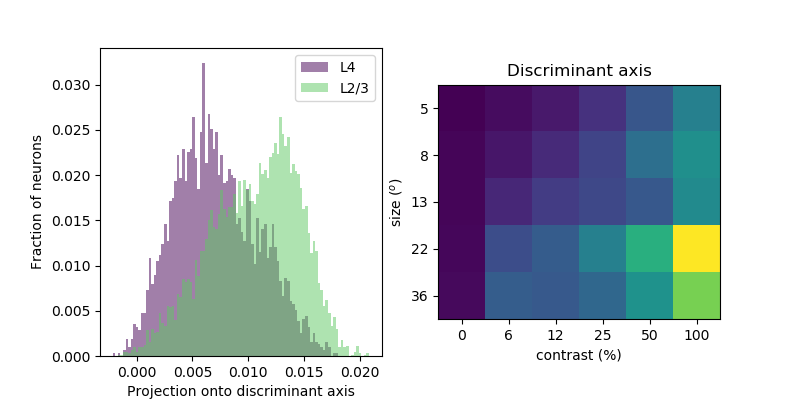

In [138]:
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
x = [None]*2
for i in range(2):
    lkat = which==i
    x[i] = u[lkat,:n_ev] @ proj1
xmin = np.minimum(*[u.min() for u in x])
xmax = np.maximum(*[u.max() for u in x])
xs = np.linspace(xmin,xmax,101)
for i in range(2):
    h,_ = np.histogram(x[i],bins=xs)#,alpha=0.5,facecolor=colors[i])
    plt.bar(xs[:-1],h/h.sum(),alpha=0.5,facecolor=colors[i],align='edge',width=xs[1]-xs[0],label=layers[i])
plt.xlabel('Projection onto discriminant axis')
plt.ylabel('Fraction of neurons')
plt.legend()

plt.subplot(1,2,2)
show_size_contrast((proj1.T @ v[:n_ev]).reshape((nsize,ncontrast)))
plt.xlabel('contrast (%)')
plt.ylabel('size ($^o$)')
plt.title('Discriminant axis')

plt.savefig('figures/l4_l23_lda_histogram_size_contrast.pdf')

<IPython.core.display.Javascript object>


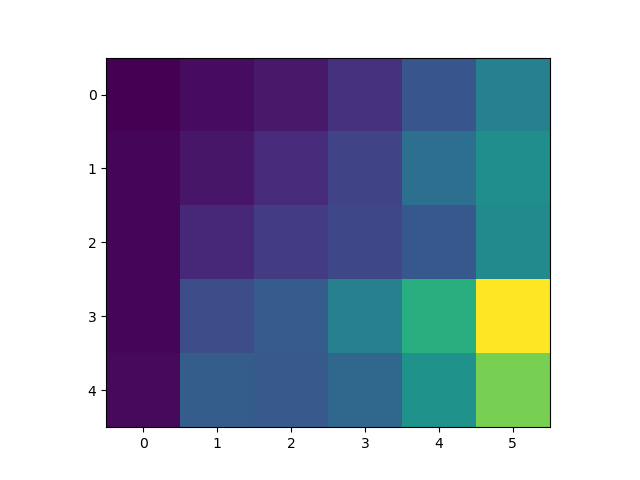

<IPython.core.display.Javascript object>


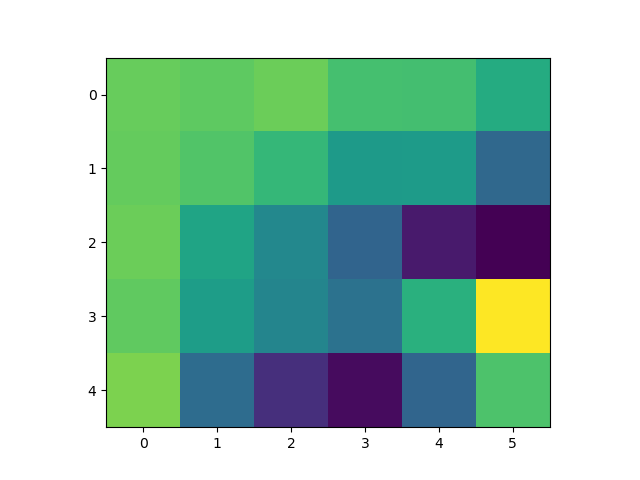

In [59]:
plt.figure()
plt.imshow((proj1.T @ v[:n_ev]).reshape((5,6)))
plt.figure()
plt.imshow((proj2.T @ v[:n_ev]).reshape((5,6)))

/home/mossing/anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


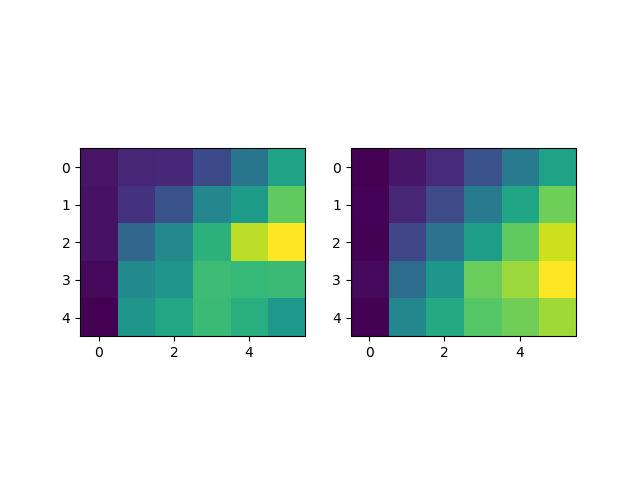

In [1116]:
plt.figure()
plt.subplot(1,2,1)
plt.imshow(np.nanmean(rl4,0))
plt.subplot(1,2,2)
plt.imshow(np.nanmean(rpc,0))